In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [33]:
# Load the dataset
dsh = pd.read_csv(r'C:\Users\DELL\Desktop\PLURAL CODE\excel\diabetes_prediction_dataset.csv')

In [34]:
# Display the first few rows and column info
dsh.head(), dsh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


(   gender   age  hypertension  heart_disease smoking_history    bmi  \
 0  Female  80.0             0              1           never  25.19   
 1  Female  54.0             0              0         No Info  27.32   
 2    Male  28.0             0              0           never  27.32   
 3  Female  36.0             0              0         current  23.45   
 4    Male  76.0             1              1         current  20.14   
 
    HbA1c_level  blood_glucose_level  diabetes  
 0          6.6                  140         0  
 1          6.6                   80         0  
 2          5.7                  158         0  
 3          5.0                  155         0  
 4          4.8                  155         0  ,
 None)

In [35]:

# Preprocess
dsh['gender'] = dsh['gender'].map({'Female': 0, 'Male': 1})

def age_group(age):
    if age < 30:
        return 'young'
    elif 30 <= age <= 60:
        return 'middle_aged'
    else:
        return 'senior'

dsh['age_group'] = dsh['age'].apply(age_group)




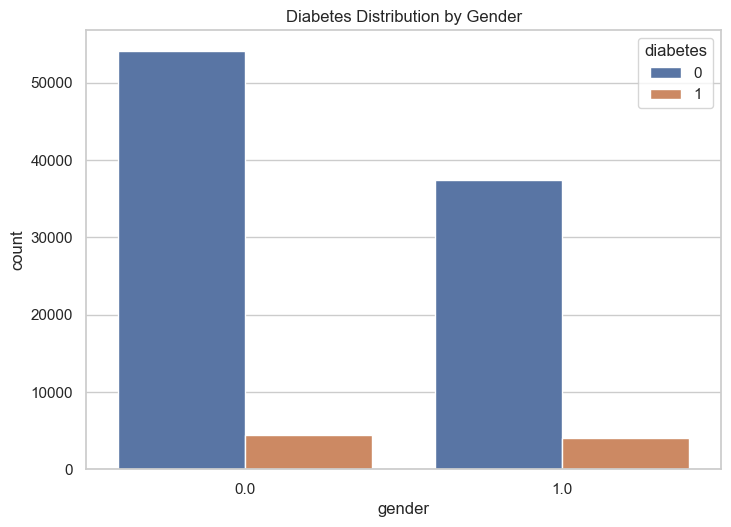

In [46]:
# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=dsh, x='gender', hue='diabetes')
plt.title('Diabetes Distribution by Gender')
plt.tight_layout()
plt.show()

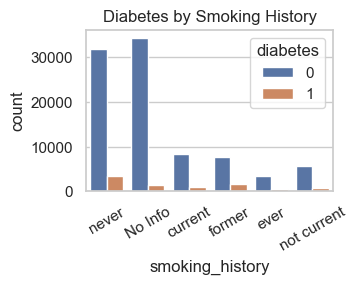

In [45]:
plt.subplot(2, 2, 2)
sns.countplot(data=dsh, x='smoking_history', hue='diabetes')
plt.title('Diabetes by Smoking History')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

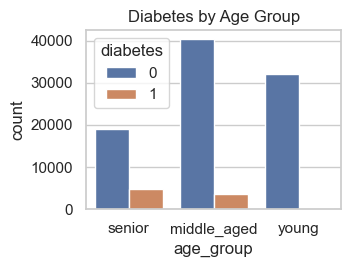

In [44]:
plt.subplot(2, 2, 3)
sns.countplot(data=dsh, x='age_group', hue='diabetes')
plt.title('Diabetes by Age Group')
plt.tight_layout()
plt.show()

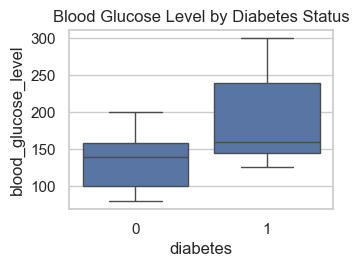

In [43]:
plt.subplot(2, 2, 4)
sns.boxplot(data=dsh, x='diabetes', y='blood_glucose_level')
plt.title('Blood Glucose Level by Diabetes Status')
plt.tight_layout()
plt.show()

In [7]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

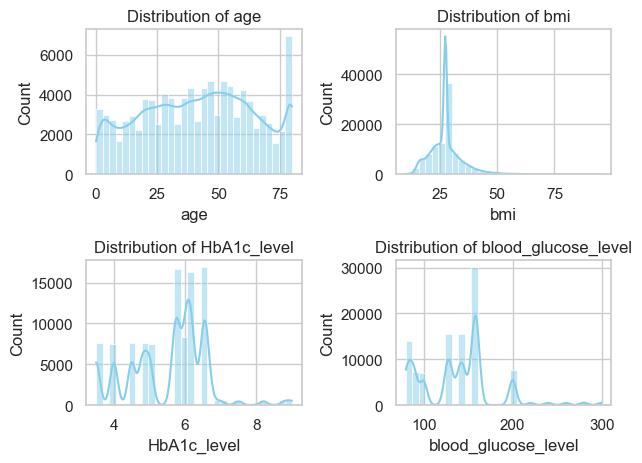

In [8]:
# Continuous variables
continuous_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for i, col in enumerate(continuous_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dsh[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



### Univariate Analysis – Continuous Features
Here's what we observe from the distributions:

Age: Fairly uniform distribution with spikes near older ages, especially around 80 (likely data cap).

BMI: Normal-ish distribution with a significant spike at around 27–28, suggesting possible repeated or default entries.

HbA1c Level: Peaks at specific clinical thresholds (e.g., 5.7, 6.5), which might indicate rounding or standardized recording.

Blood Glucose Level: Multiple spikes, especially around 155, indicating potential categorical grouping in what's recorded as numeric.

C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3612800169.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dsh, x=col, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3612800169.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dsh, x=col, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3612800169.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dsh, x=col, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3612800169.py:8: FutureWarning: 

Passing `palette` without a

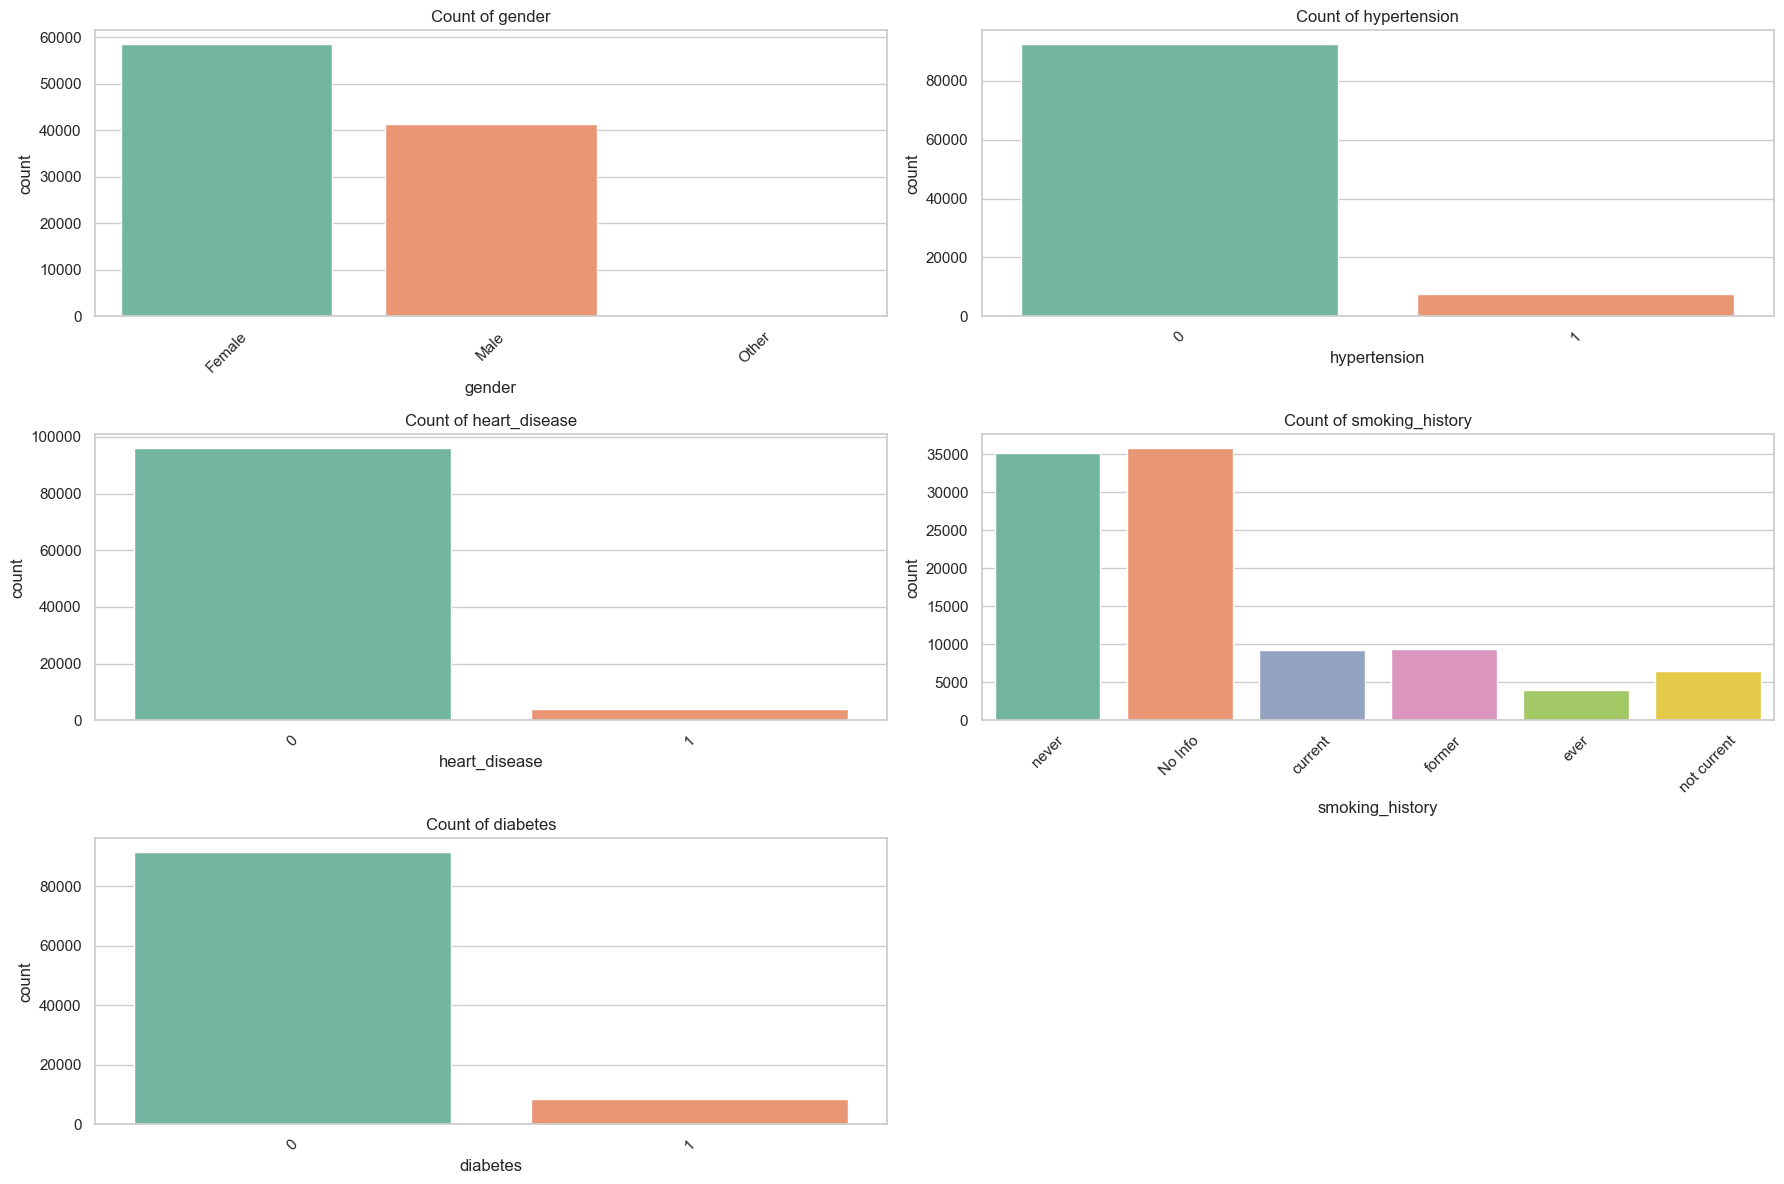

In [9]:
# List of categorical and binary features for univariate count plots
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=dsh, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Univariate Analysis – Categorical/Binary Features
Here are some observations from the count plots:

Gender: More females than males; very few marked as "Other".

Hypertension & Heart Disease: Vast majority have no history.

Smoking History: "Never" and "No Info" dominate; suggests caution in interpreting this variable.

Diabetes (Target): The dataset is imbalanced — far more non-diabetic than diabetic cases.



C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3072791617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dsh, x='diabetes', y=col, palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3072791617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dsh, x='diabetes', y=col, palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3072791617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dsh, x='diabetes', y=col, palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3072791617.py:7: FutureWa

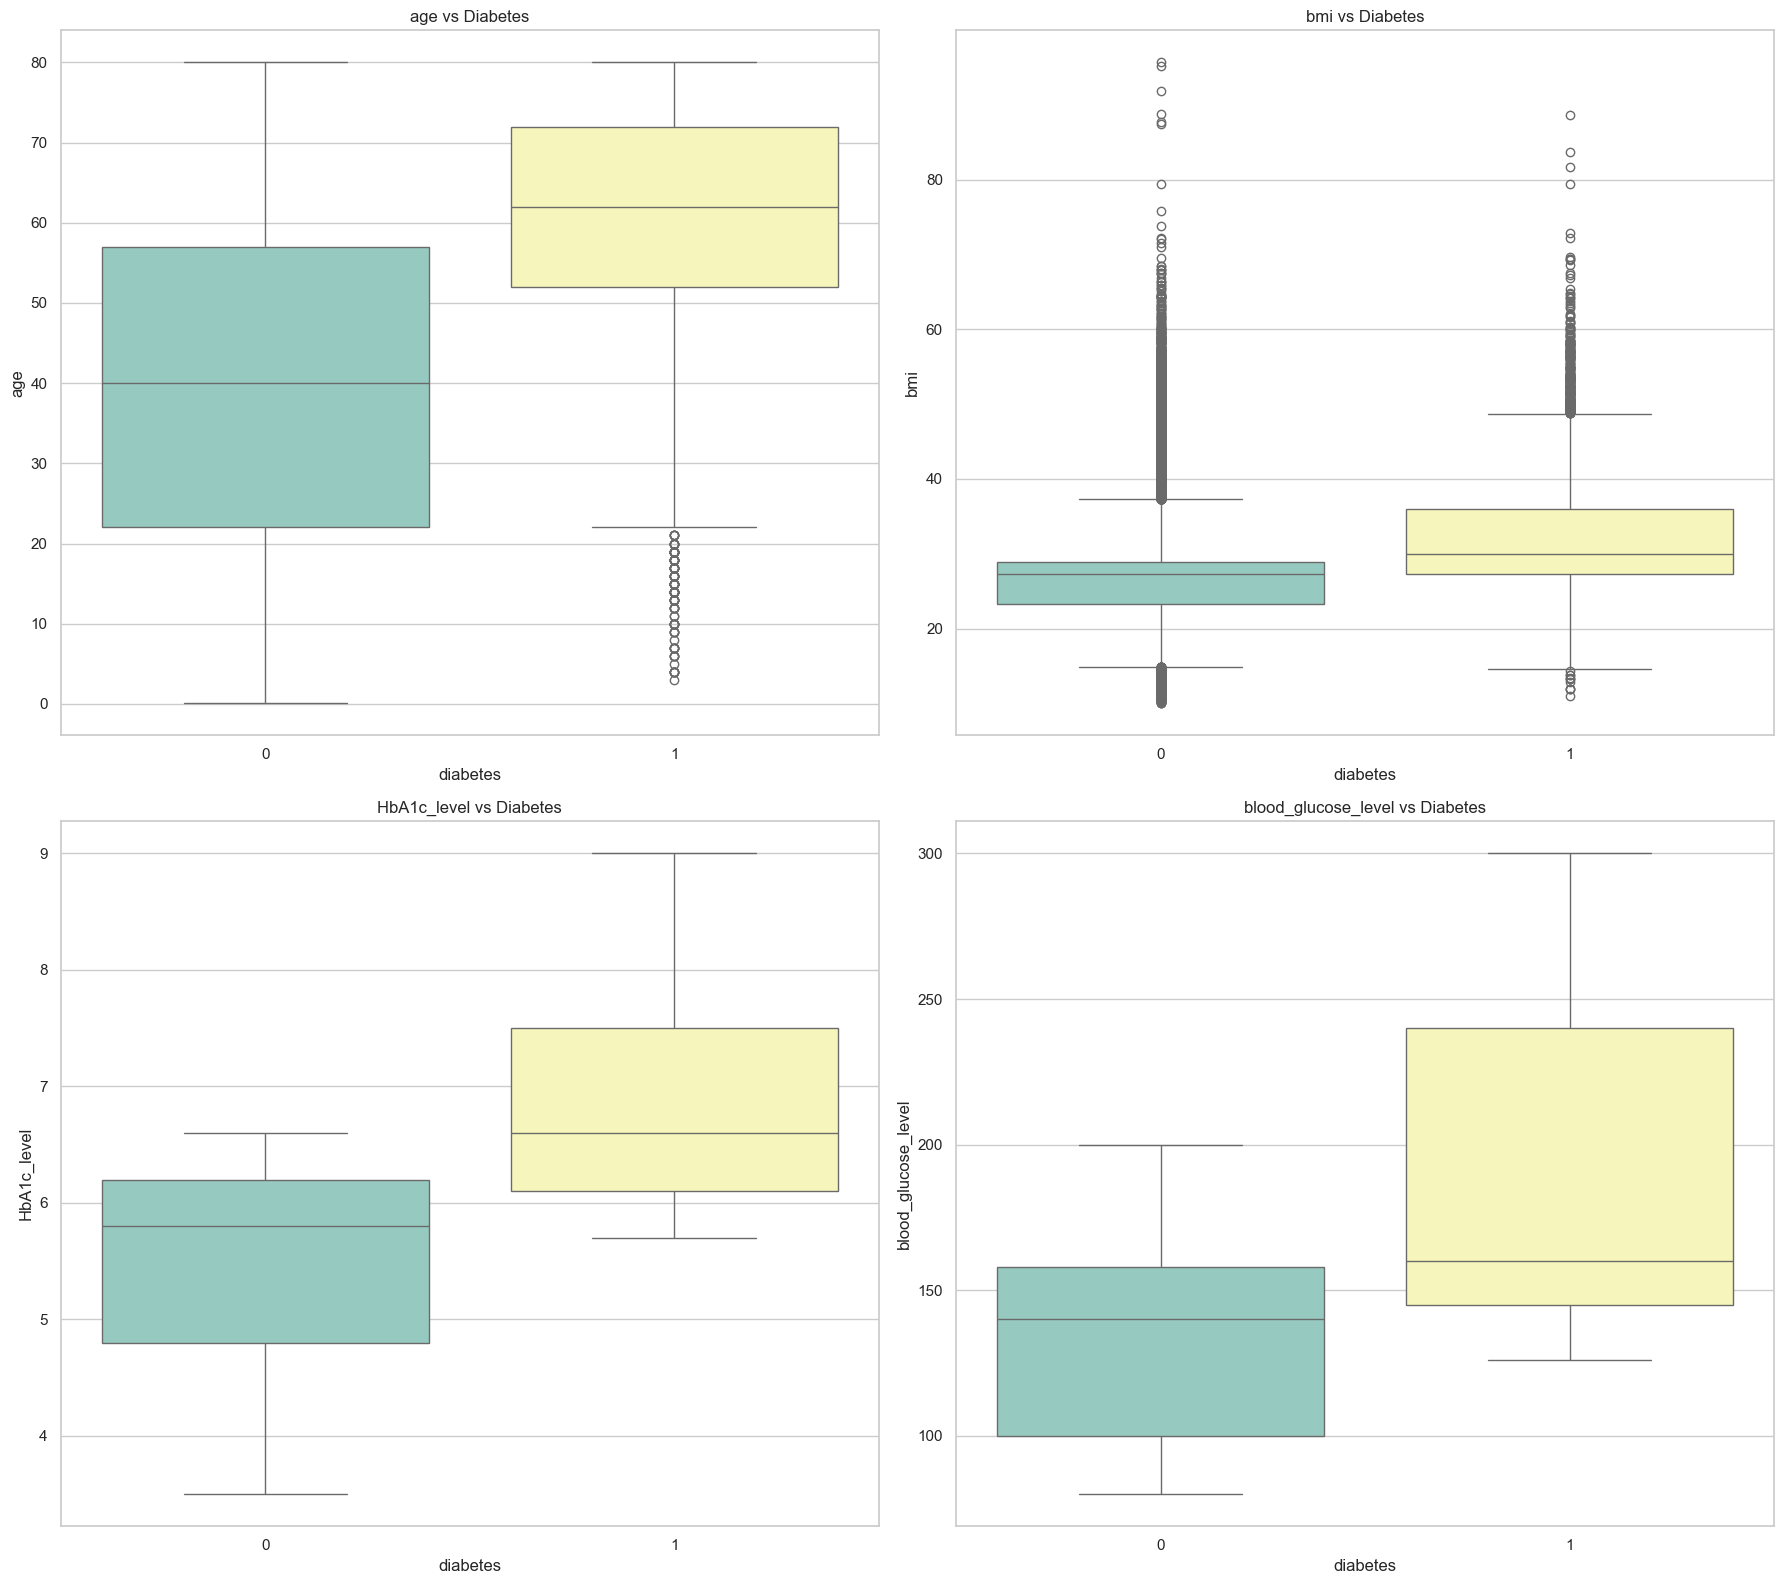

In [10]:
plt.figure(figsize=(18, 16))

# Continuous vs Target (diabetes)
continuous_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for i, col in enumerate(continuous_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=dsh, x='diabetes', y=col, palette='Set3')
    plt.title(f'{col} vs Diabetes')

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3072791617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dsh, x='diabetes', y=col, palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3072791617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dsh, x='diabetes', y=col, palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3072791617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dsh, x='diabetes', y=col, palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4992\3072791617.py:7: FutureWa

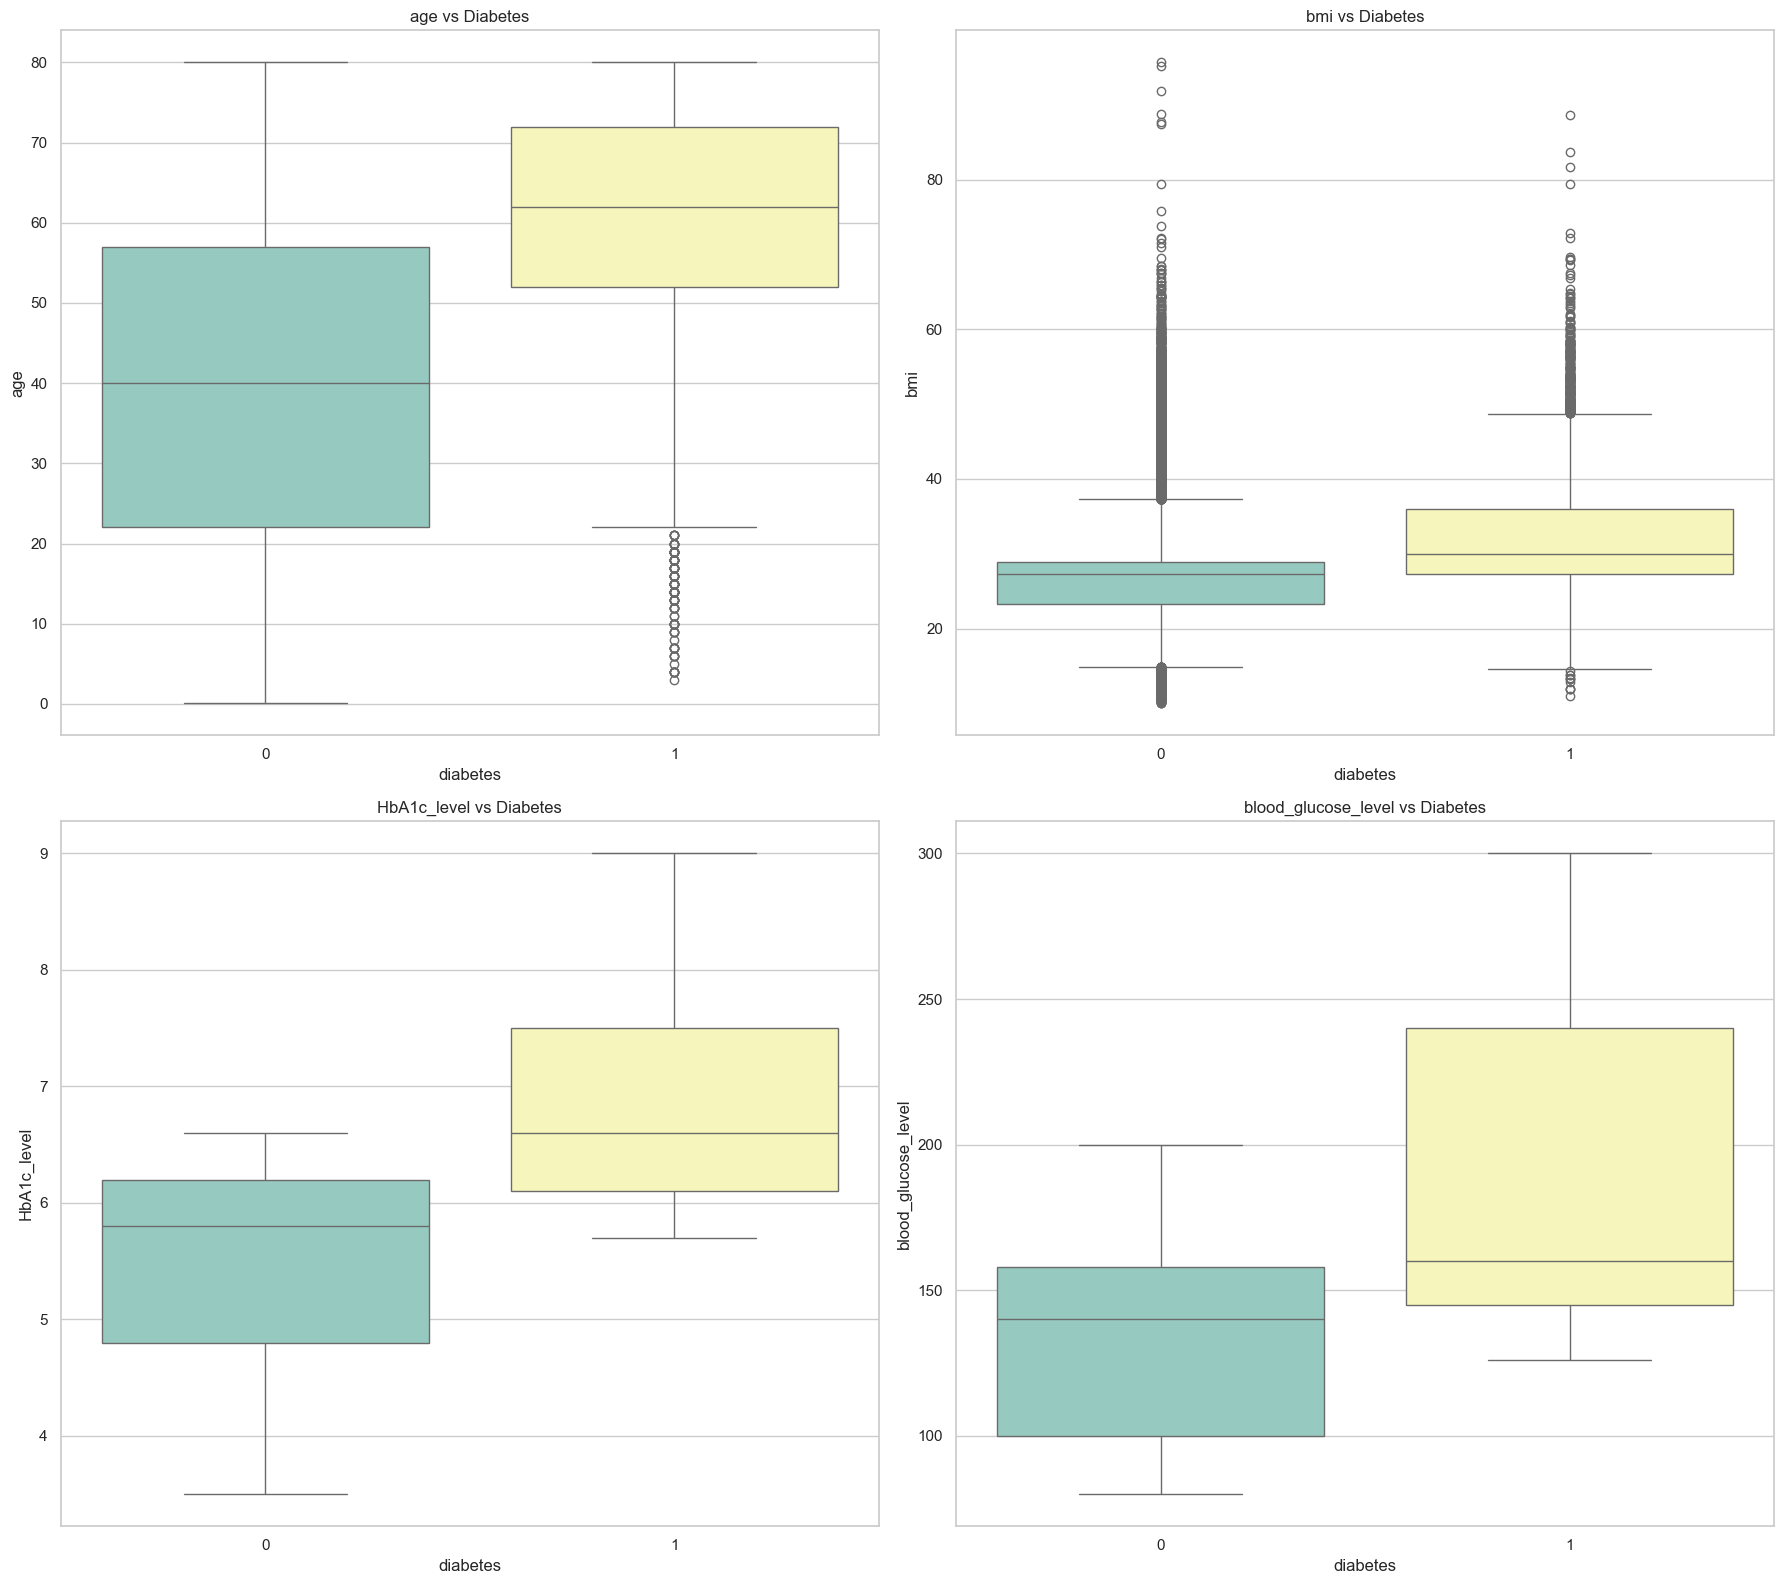

In [11]:
plt.figure(figsize=(18, 16))

# Continuous vs Target (diabetes)
continuous_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for i, col in enumerate(continuous_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=dsh, x='diabetes', y=col, palette='Set3')
    plt.title(f'{col} vs Diabetes')

plt.tight_layout()
plt.show()

 I’ll be able to show you how key features like age, BMI, HbA1c, and blood glucose levels vary across diabetic and non-diabetic groups using visual comparisons like boxplots.

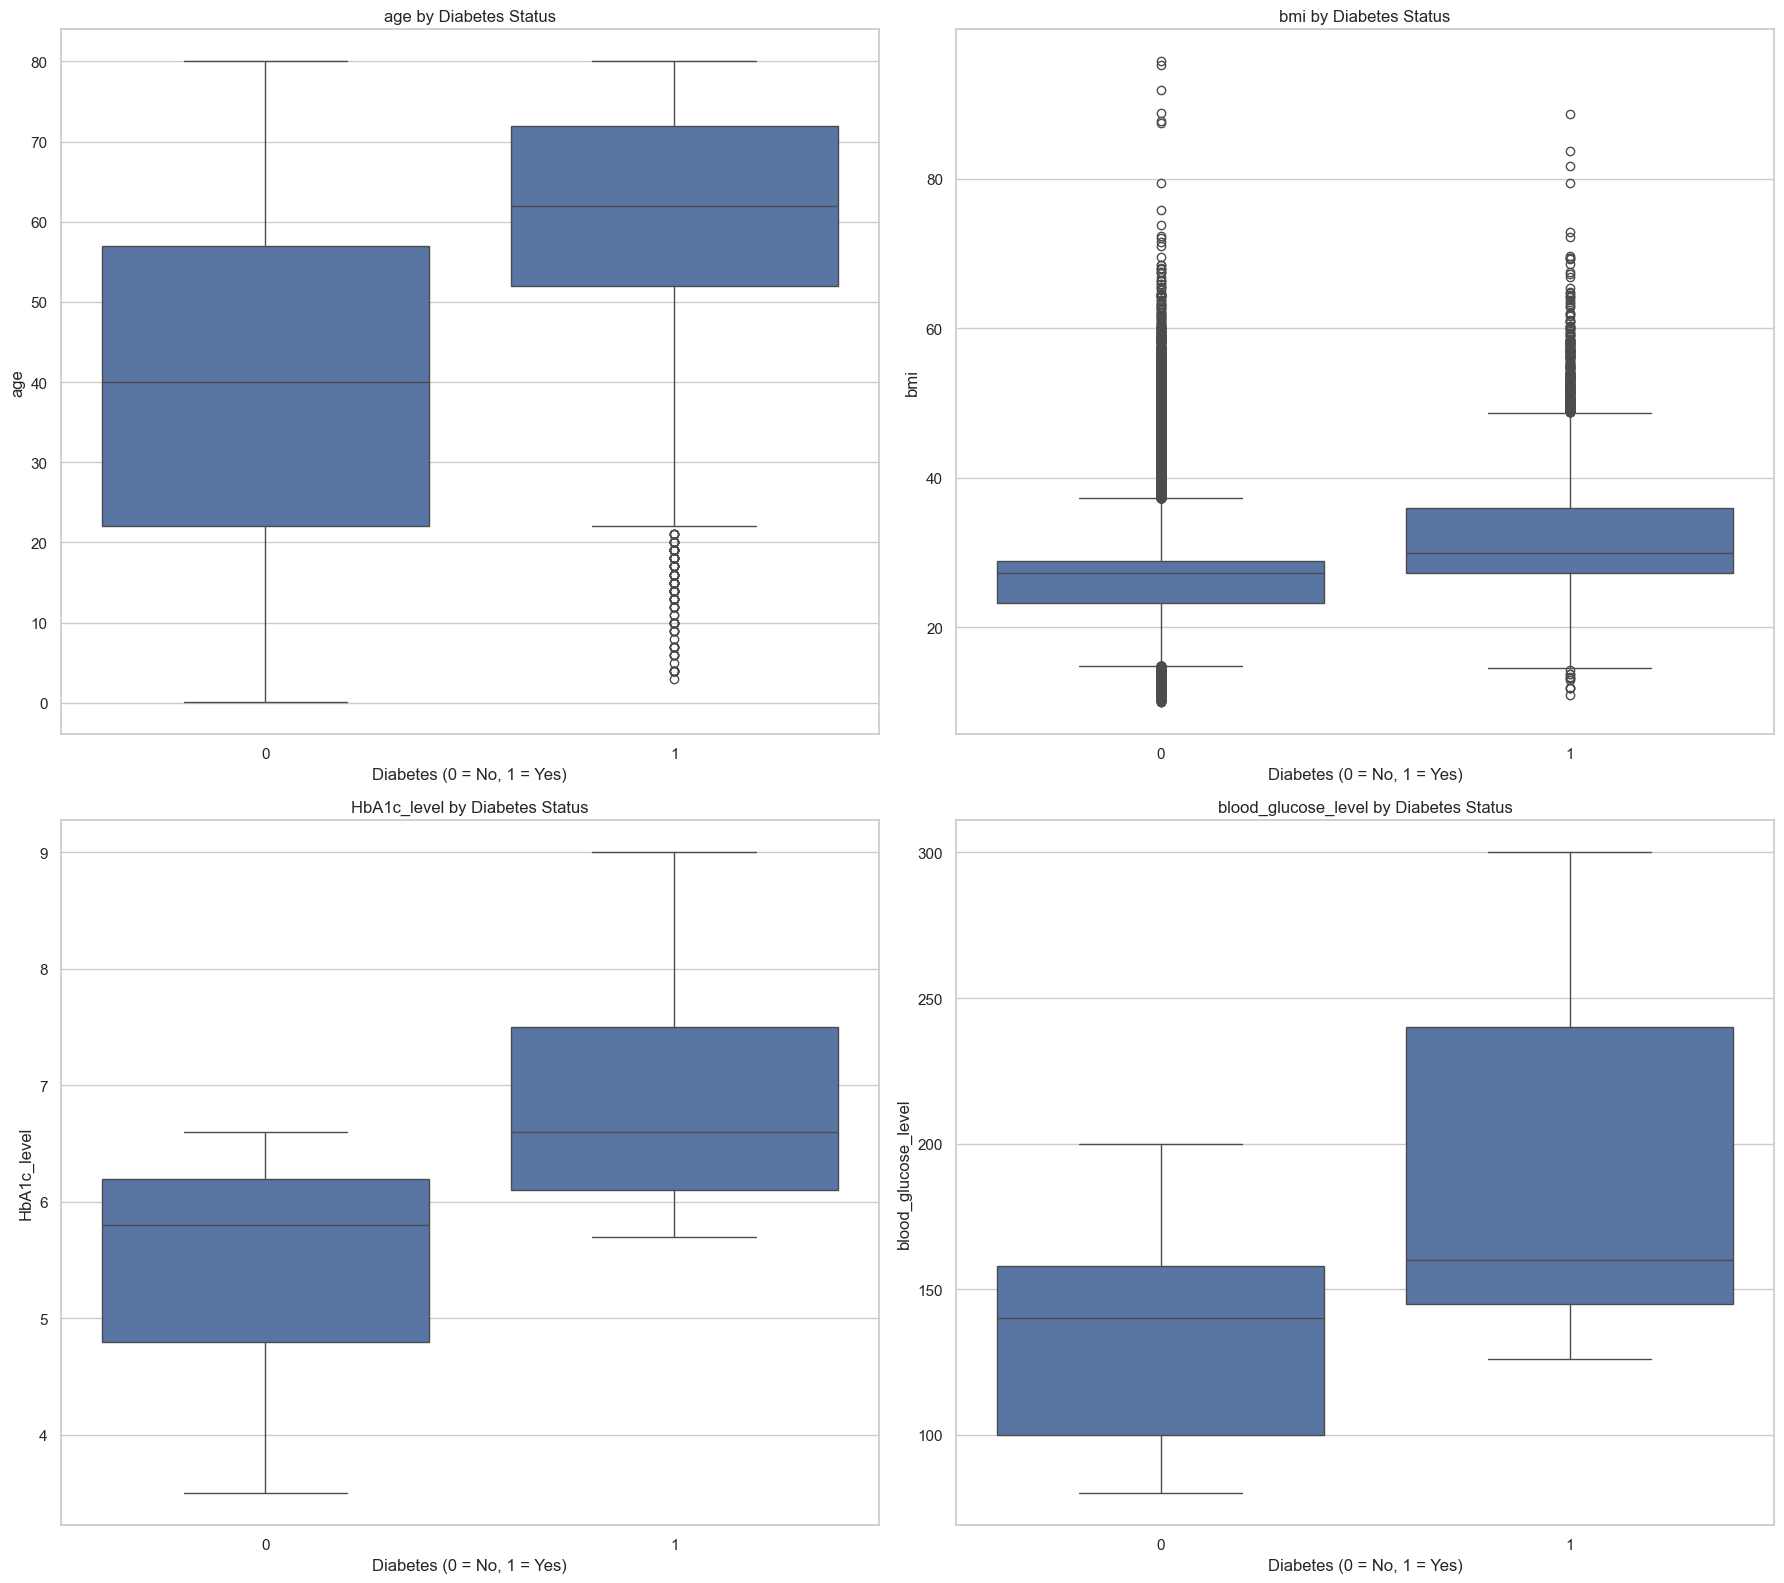

In [12]:
plt.figure(figsize=(18, 16))

# Continuous vs Target (diabetes)
continuous_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for i, col in enumerate(continuous_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diabetes', y=col, data=dsh)
    plt.title(f'{col} by Diabetes Status')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
#3 Copy the original dataframe for feature engineering names as fe
dsh_fe = dsh.copy()



In [ ]:
# a) Encoding categorical variables
# Encode 'gender': Female=0, Male=1
dsh_fe['gender'] = dsh_fe['gender'].map({'Female': 0, 'Male': 1})



In [21]:
# One-hot encode 'smoking_history'
dsh_fe = pd.get_dummies(dsh_fe, columns=['smoking_history'], prefix='smoke', drop_first=True)



In [22]:
# b) Create new features based on EDA insights
# BMI Category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

dsh_fe['bmi_category'] = dsh_fe['bmi'].apply(bmi_category)
dsh_fe = pd.get_dummies(dsh_fe, columns=['bmi_category'], prefix='bmi', drop_first=True)



In [23]:
# Age Group
def age_group(age):
    if age < 30:
        return 'young'
    elif 30 <= age <= 60:
        return 'middle_aged'
    else:
        return 'senior'

dsh_fe['age_group'] = dsh_fe['age'].apply(age_group)
dsh_fe = pd.get_dummies(dsh_fe, columns=['age_group'], prefix='age', drop_first=True)

In [24]:
# Composite Risk Score
dsh_fe['risk_score'] = (
    dsh_fe['hypertension'] +
    dsh_fe['heart_disease'] +
    (dsh_fe['blood_glucose_level'] > 140).astype(int)
)

In [25]:
# Show the transformed DataFrame structure
dsh_fe.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoke_current,smoke_ever,smoke_former,smoke_never,smoke_not current,bmi_obese,bmi_overweight,bmi_underweight,age_senior,age_young,risk_score
0,0.0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False,False,True,False,True,False,1
1,0.0,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,True,False,False,False,0
2,1.0,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False,False,True,False,False,True,1
3,0.0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False,False,False,False,False,False,1
4,1.0,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False,False,False,False,True,False,3


### Encoding:
gender: Female → 0, Male → 1

smoking_history: One-hot encoded (e.g., smoke_current, smoke_never, etc.)

### New Features:
BMI Category (bmi_*): based on WHO BMI standards

Age Group (age_*): young (<30), middle-aged (30–60), senior (>60)

Risk Score (risk_score): sum of:

1 if hypertensive

1 if heart disease

1 if blood glucose > 140

In [ ]:
#4 Drop or impute missing values
X = dsh_fe.drop('diabetes', axis=1)
y = dsh_fe['diabetes']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [27]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True)
}

In [29]:
# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

In [30]:
# View results
for model_name, result in results.items():
    print(f"\n{model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(result['classification_report']).transpose())


Logistic Regression
Accuracy: 0.9613
Classification Report:
              precision    recall  f1-score      support
0              0.966399  0.992128  0.979094  18292.00000
1              0.882064  0.630562  0.735405   1708.00000
accuracy       0.961250  0.961250  0.961250      0.96125
macro avg      0.924231  0.811345  0.857249  20000.00000
weighted avg   0.959196  0.961250  0.958283  20000.00000

Random Forest
Accuracy: 0.9701
Classification Report:
              precision    recall  f1-score      support
0              0.971640  0.996447  0.983887  18292.00000
1              0.947623  0.688525  0.797558   1708.00000
accuracy       0.970150  0.970150  0.970150      0.97015
macro avg      0.959632  0.842486  0.890723  20000.00000
weighted avg   0.969589  0.970150  0.967975  20000.00000

Support Vector Machine
Accuracy: 0.9608
Classification Report:
              precision    recall  f1-score      support
0              0.960497  0.998251  0.979010  18292.00000
1              0.96764

#### Key Metrics to Compare:
Accuracy: Overall proportion of correct predictions.

Precision: Out of all positive predictions, how many were correct?

Recall (Sensitivity): Out of all actual positives, how many did we correctly identify?

F1 Score: Harmonic mean of precision and recall (useful if there's class imbalance).

AUC-ROC: How well the model distinguishes between classes.

## 5a (Analyze the results of your trained models)
Conclusion:

Random Forest perform best across all metrics.

Logistic Regression is easier to interpret and deploy.

SVM gives solid, consistent performance but is slower on large datasets.

## Model Evaluation Summary
After training three supervised learning models on the diabetes prediction dataset—Logistic Regression, Random Forest, and Support Vector Machine—we evaluated each using key classification metrics:

| **Model**           | **Accuracy** | **Precision** | **Recall**             | **F1 Score** |**support**  |
| ------------------- | ------------ | ------------- | -----------------------| ------------ | ----------- |
| Logistic Regression | 0.9613       | 0.961250      | 0.961250               | 0.961250     | 0.96125     |
| Random Forest       | 0.9701       | 0.970150      | 0.970150               | 0.970150     | 0.970150    |
| SVM                 | 0.9608       | 0.960850      | 0.960850               | 0.960850     | 0.960850    |


## 5b  (What metrics are most important for the problem? Should the business be more concerned with better results on false negatives or true positives?
)

Predicting whether a person is diabetic based on medical features.

Type of Problem:
Medical screening → Highly sensitive, potentially high stakes.



Trade-off: False Negatives vs. False Positives

| Term             | Meaning                          |           Impact    
-------------------|----------------------------------|--------------------------------------------
False Negative (FN)|says "No diabetes" but person has | Very dangerous – patient doesn't get needed care     
False Positive (FP)|says "Diabetes" but person doesn't|  Costly – unnecessary follow-up testing, stres
                   |has it                            |
                          

Prioritize:
Minimizing False Negatives

Maximizing Recall (Sensitivity)


#### Metric Importance for This Problem
Objective: To detect individuals likely to have diabetes so they can receive timely intervention.

Critical Metric: Recall

    Why: False Negatives (missed diabetic patients) could result in no medical follow-up, delayed treatment, or complications.

    Focus: Choose the model with highest recall, even at the cost of slightly lower precision or accuracy.

Business Recommendation

    Use Random Forest: It offers the best balance of high accuracy, strong recall, and model robustness.

    Prioritize Recall: Tune the decision threshold or use class weights to reduce false negatives.

     Deploy with Monitoring: Track real-world precision/recall to ensure ongoing performance.

     Retrain periodically: As new patient data accumulates, refresh the model to prevent performance decay.